# Informacje sprzętowe

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 12 10:50:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**GPU** (Graphics Processing Unit) to specjalizowane układy zaprojektowane do szybkiego przetwarzania obrazów i danych. Ich główna przewaga nad CPU (Central Processing Unit) wynika z możliwości równoległego przetwarzania wielu operacji, co sprawia, że są szybsze w zadaniach wymagających intensywnych obliczeń na dużych zbiorach danych, takich jak uczenie maszynowe, symulacje fizyczne czy grafika komputerowa. Ta zdolność do równoległego przetwarzania, w połączeniu ze specjalizacją w operacjach matematycznych i graficznych, czyni GPU wydajniejszymi energetycznie i szybszymi w specyficznych aplikacjach obliczeniowych w porównaniu do bardziej uniwersalnych CPU.

**Karta graficzna NVIDIA Tesla T4**, bazująca na architekturze Turing, to zaawansowane rozwiązanie obliczeniowe zaprojektowane dla zastosowań w uczeniu maszynowym, uczeniu głębokim oraz HPC (High-Performance Computing). Charakteryzuje się niskim poborem mocy (70W) przy jednoczesnej wysokiej wydajności, dzięki czemu jest idealnym wyborem dla centrów danych i profesjonalnych aplikacji obliczeniowych wymagających efektywnego przetwarzania danych.

Kluczowe cechy NVIDIA Tesla T4:
* **Architektura Turing:** Zapewnia zaawansowane przyspieszenie obliczeń dzięki 320 procesorom tensorowym, oferując do 65 teraflopów wydajności w precyzji FP16.
* **Pamięć GDDR6:** Posiada 16 GB pamięci, co umożliwia efektywne zarządzanie dużymi zbiorami danych.
* **Energooszczędność:** Wyróżnia się niskim poborem mocy, co sprawia, że jest wyjątkowo energooszczędna.
* **Wszechstronność zastosowań:** Przystosowana do szerokiego zakresu zastosowań, od analizy danych po trening modeli AI, co czyni ją wszechstronnym narzędziem dla przedsiębiorstw i instytucji badawczych.

NVIDIA Tesla T4 jest ceniona za swoją zdolność do szybkiego przetwarzania danych i efektywnego wnioskowania w modelach uczenia głębokiego, stanowiąc kluczowe narzędzie w zaawansowanych aplikacjach obliczeniowych.

# Instalacja i wersje pakietów

In [3]:
pip install colorama

In [4]:
pip install keras

In [5]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from colorama import Fore

In [6]:
!python --version
print('Keras: ', keras.__version__)
print('Tensorflow: ', tf.__version__)
print('Pandas: ', pd.__version__)
print('NumPy: ', np.__version__)

Python 3.10.12
Keras:  2.15.0
Tensorflow:  2.15.0
Pandas:  2.0.3
NumPy:  1.25.2


* **Pandas** - biblioteka Pythona służąca do analizy i manipulacji danymi. Oferuje struktury danych i operacje do manipulowania tabelami numerycznymi i czasowymi, co czyni ją nieocenionym narzędziem w przetwarzaniu i analizie danych.

* **NumPy** - biblioteka do obliczeń naukowych w Pythonie, która zapewnia wsparcie dla dużych, wielowymiarowych tablic i macierzy, wraz z dużą kolekcją funkcji matematycznych do operowania na tych tablicach. Jest szeroko stosowana w analizie danych, algebrze liniowej, przetwarzaniu obrazów, itp.

* **Keras** - wysokopoziomowe API dla sieci neuronowych, które działa na zasadzie nakładki na inne, bardziej złożone frameworki, takie jak TensorFlow. Używa się go głównie do szybkiego prototypowania modeli głębokiego uczenia, dzięki łatwemu w użyciu, intuicyjnemu interfejsowi.

* **Tensorflow** - framework open source do obliczeń numerycznych, wykorzystywany przede wszystkim w dziedzinie uczenia maszynowego i głębokiego uczenia. Oferuje bogaty zestaw narzędzi do projektowania, treningu i wdrażania modeli sieci neuronowych.

* **Colorama** - umożliwia łatwe wykorzystanie kolorowego tekstu i tła w terminalu. 

# Pobranie zestawu danych



In [7]:
# Pobranie danych MNIST z biblioteki Keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Łączenie zestawu treningowego i testowego
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

print(f'Rozmiar zbioru danych: {images.shape}')
print(f'\n--------{Fore.GREEN}Obrazy zostały załadowane pomyślnie!{Fore.BLACK}--------')

11490434/11490434 [==============================] - 2s 0us/step
Rozmiar zbioru danych: (70000, 28, 28)

--------Obrazy zostały załadowane pomyślnie!--------


Dane mnist pobrane zostały z biblioteki Keras.

Zbiór danych **MNIST** składa się z **70 000** oznakowanych obrazów ręcznie pisanych cyfr (od 0 do 9), podzielonych na zbiór treningowy (60 000 obrazów) i testowy (10 000 obrazów). Każdy obraz ma rozmiar 28x28 pikseli. 

W celach badawczych zdecydowano się na rozkład danych w stosunku 80% danych treningowych i 20% danych testowych, w związku z czym postanowiono połączyć zbiory pobrane z biblioteki Keras i samodzielnie je podzielić w kolejnych krokach. 

# Funkcje niestandardowe

___

## Operacje na danych

In [12]:
def shuffle_data(images: np.ndarray, labels: np.ndarray, random_seed: int, size: int) -> list:
    """Konwersja obrazów do 3-kanałowego typu RGB,
       zmiana rozmiaru obrazów wejściowych w celu dopasowania do wybranego modelu oraz
       normalizacja obrazów do wartości w przedziale [0, 255]

    Args:
        images (np.ndarray): Dane wejściowe
        labels (np.ndarray): Etykiety
        random_seed (int): Ziarno ustalone w celu mozliwości odtworzenia wyników
        size (int): Ilość danych wejściowych

    Returns:
        (list): (sampled_images, sampled_labels)
    """
    # Zapewnienie odtwarzalności
    np.random.seed(random_seed)

    # Tasowanie indeksów w celu losowego wyboru danych
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)

    # Wybór określonej liczby próbek
    selected_indices = indices[:size]

    return images[selected_indices], labels[selected_indices]

In [13]:
def resize_images(images: np.ndarray, shape:list) -> tf.Tensor:
  """Konwersja obrazów do 3-kanałowego typu RGB,
     zmiana rozmiaru obrazów wejściowych w celu dopasowania do wybranego modelu oraz
     normalizacja obrazów do wartości w przedziale [0, 255]

  Args:
      images (np.ndarray): Dane wejściowe
      shape (list): Nowy rozmiar obrazu

  Returns:
      images_resized: tf.Tensor
  """
  # Przekształcenie w RGB (3 kanały)
  images_rgb = np.repeat(images[..., np.newaxis], 3, axis=-1)
  # Zmiana rozmiaru
  images_resized = tf.image.resize(images_rgb, shape)
  # Normalizacja
  images_resized /= 255.0

  return images_resized

## Budowa modeli CNN

In [33]:
from keras.applications import VGG16, VGG19
from keras import layers, models

def build_VGG_model(model_type: str) -> models:
    """Budowa modelu VGG16 na podstawie wstępnie przetrenowanego modelu
      z biblioteki keras

    Args:
        model_type (str): VGG16 or VGG19

    Returns:
        (models): new pretrained VGG model
    """
    # Utworzenie modelu VGG16 z wstępnie wytrenowanego na danych ImageNet, z wyłączeniem górnych w pełni połączonych warstw.
    if model_type == 'VGG16':
      base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    elif model_type == 'VGG19':
      base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    else:
      raise ValueError("Wrong value! model value must be 'VGG16' or 'VGG19'")

    # Zamrożenie warstw modelu bazowego, aby zapobiec ich aktualizacji podczas pierwszej fazy treningu.
    for layer in base_model.layers:
        layer.trainable = False

    # Stworzenie modelu
    model = models.Sequential()

    # Dodanie przetrenowanej architektury modelu VGG16
    model.add(base_model)

    # Dodanie nowej warswy wyjściowej
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax')) # 10 klas dla klasyfikacji cyfr

    # Kompilacja modelu
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [11]:
import time

def train_model(model, x_train, y_train, val_data, epochs) -> list:
  """Trening modelu na danych wejściowych, z pomiarem czasu

  Args:
      model (models): Architektura sieci modelu
      x_train (tf.Tensor): Zbiór danych treningowych
      y_train (tf.Tensor): Zbiór etykiet treningowych
      val_data (tuple): Zbiór danych walidacyjnych, Zbiór etykiet walidacyjnych

  Returns:
      (list): wytrenowany model, czas treningu
  """
  # Start pomiaru czasu
  start_time = time.time()

  # Trening modelu
  history = model.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=64,
                      validation_data=val_data,
                      verbose=1)

  # Stop pomiaru czasu
  end_time = time.time()
  training_time = end_time - start_time
  print(f"Trening ukończony w przeciągu: {training_time:.2f} sekund")

  return history, training_time

## Wykresy i funkcje pomocnicze

In [14]:
INDEXES = ["Czas treningu", "Dokładność treningowa", "Dokładność walidacyjna", "Strata treningowa", "Strata walidacyjna"]

def create_df(output_data: dict) -> pd.DataFrame:
  """ Utworzenie DataFrame do magazynowania danych z badań

  Args:
      output_data (dict): Dane z badań w słowniku

  Returns:
      (pd.DataFrame): dane w strukturze data frame
  """
  return pd.DataFrame(output_data, index=INDEXES)

In [102]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history) -> None:
    """ Tworzenie wykresów dokładności i straty dla modelu

    Args:
        history (model): Wytrenowany model
    """
    def change_to_percent(elements):
      return [i*100 for i in elements]

    # Wykresy dokładności i straty
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))

    # Wykres dokładności modelu
    axs[0].plot(change_to_percent(history.history['accuracy']), label=f'Dokładność testowa')
    axs[0].plot(change_to_percent(history.history['val_accuracy']), label='Dokładność walidacyjna')
    axs[0].set_title(f'Dokładność modelu')
    axs[0].set_ylabel('Dokładność [%]')
    axs[0].set_xlabel('Liczba epok')
    axs[0].legend(loc='lower right')
    axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}'))

    # Wykres starty modelu
    axs[1].plot(change_to_percent(history.history['loss']), label='Strata treningowa')
    axs[1].plot(change_to_percent(history.history['val_loss']), label='Strata walidacyjna')
    axs[1].set_title(f'Strata modelu')
    axs[1].set_ylabel('Strata [%]')
    axs[1].set_xlabel('Liczba epok')
    axs[1].legend(loc='upper right')
    axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}'))

    plt.tight_layout()
    plt.show()

In [50]:
def plot_results(model_df: pd.DataFrame) -> None:
  """ Tworzenie wykresu dokładności i straty dla
      kolejnych ilości danych wejściowych

  Args:
      model_df (pd.DataFrame): Dane z badań w formie pandas DataFrame
  """
  # Transpozycja DataFrame dla łatwiejszego plotowania
  df_t = model_df.T

  # Tworzenie wykresu
  plt.figure(figsize=(10, 6))

  # Plotowanie dokładności
  plt.plot(df_t.index, df_t["Dokładność treningowa"], '-o', label='Dokładność testowa', color='red')
  plt.plot(df_t.index, df_t["Dokładność walidacyjna"], '-o', label='Dokładność walidacyjna', color='orange')

  # Plotowanie straty
  plt.plot(df_t.index, df_t["Strata treningowa"], '-o', label='Strata testowa', color='blue')
  plt.plot(df_t.index, df_t["Strata walidacyjna"], '-o', label='Strata walidacyjna', color='green')

  # Dodanie tytułu i etykiet
  plt.title('Dokładność i strata w zależności od ilości danych wejściowych')
  plt.xlabel('Ilość danych wejściowych')
  plt.ylabel('Wartości [%]')

  # Dodanie legendy
  plt.legend()

  # Pokazanie wykresu
  plt.show()

In [19]:
# Ustawienie ziarna dla reprodukowalności
np.random.seed(42)

# Generowanie losowej liczby całkowitej z przedziału od 0 do 100
seeds = [np.random.randint(0, 101) for i in range(0, 7)]
seeds

[51, 92, 14, 71, 60, 20, 82]

In [29]:
def input_data_analysis(model: str, size: int, images, labels, seed: int, epochs: int) -> list:
    """Dostosowanie danych wejściowych, utworzenie modelu, trening

    Args:
        i (int): Numer modelu
        model (str): VGG16 lub VGG19
        size (int): Ilość danych wejściowych
        seed (int): Ziarno reprodukowalności,
        epochs (int): Ilość epoch treningu

    Returns:
        (list): wytrenowany model, czas treningowy
    """
    print('\n', '-'*30, f'{Fore.RED} Ilość danych wejściowych: {size}, model: {model} {Fore.BLACK}', '-'*30, '\n')

    # Wybór odpowiedniej ilosci danych
    sampled_images, sampled_labels = shuffle_data(images, labels, seed, size)

    # Wstępne przetwarzanie danych
    images_resized = resize_images(sampled_images, [32, 32])

    # Przygotowanie etykiet
    y_one_hot = keras.utils.to_categorical(sampled_labels, 10)

    # Podział przygotowanych danych w stosunku 80/20
    split_index = int(len(images_resized) * 0.8)
    x_train, x_test = images_resized[:split_index], images_resized[split_index:]
    y_train, y_test = y_one_hot[:split_index], y_one_hot[split_index:]

    print('\n', '-'*40, f'{Fore.GREEN} Tworzenie modelu {model} {Fore.BLACK}', '-'*40, '\n')

    # Stwórz model i zacznij trening
    VGG_model = build_VGG_model(model)

    print('\n', '-'*40, f'{Fore.GREEN} Trening modelu {model} {Fore.BLACK}', '-'*40, '\n')

    history, training_time = train_model(model = VGG_model,
                                        x_train = x_train,
                                        y_train = y_train,
                                        val_data = (x_test, y_test),
                                        epochs = epochs)

    return history, training_time


# Badanie optymalnej ilości wolumenu danych

In [24]:
SIZES = list(range(10000, 80000, 10000))
EPOCHS = 10

## VGG16

In [34]:
from collections import defaultdict

modelVgg = 'VGG16'
output_data_vgg16 = defaultdict()

for (i, size) in enumerate(SIZES):

    history_vgg16, training_time_vgg16 = input_data_analysis(modelVgg, size, images, labels, seeds[i], EPOCHS)

    output_data_vgg16[size] = [training_time_vgg16,
                              history_vgg16.history['accuracy'][-1]*100,
                              history_vgg16.history['val_accuracy'][-1]*100,
                              history_vgg16.history['loss'][-1]*100,
                              history_vgg16.history['val_loss'][-1]*100]

    del history_vgg16, training_time_vgg16



 ------------------------------  Ilość danych wejściowych: 10000, model: VGG16  ------------------------------ 


 ----------------------------------------  Tworzenie modelu VGG16  ---------------------------------------- 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                           

In [48]:
vgg16_df = create_df(output_data_vgg16)
vgg16_df

,10000,20000,30000,40000,50000,60000,70000
Czas treningu,16.904703,32.307743,47.362491,61.539884,76.910642,92.005748,108.078315
Dokładność treningowa,94.012499,95.068753,95.800000,96.068752,96.072501,96.327084,96.533930
Dokładność walidacyjna,94.050002,95.499998,96.300000,96.749997,97.079998,96.933335,97.028571
Strata treningowa,19.390714,15.130392,13.349992,12.248240,12.057025,11.079393,10.447954
Strata walidacyjna,20.532209,12.838069,11.201441,10.117539,9.114120,9.599794,9.336302


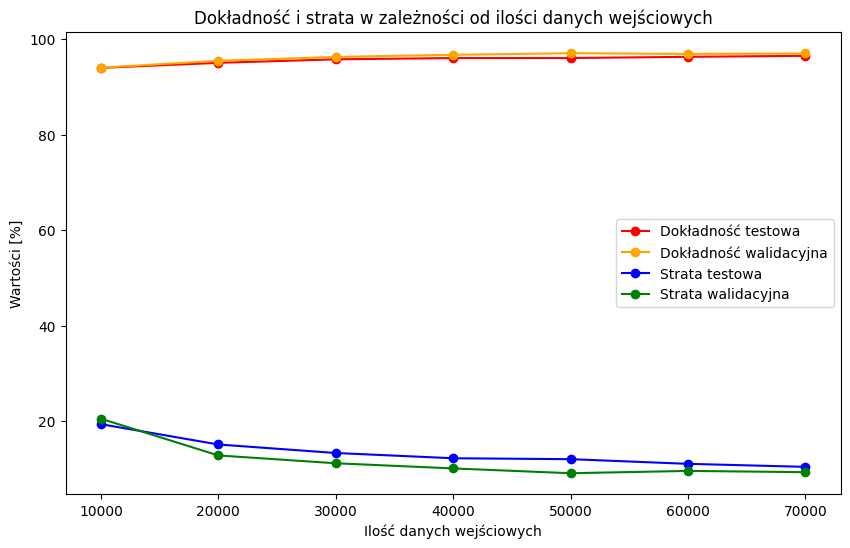

In [52]:
plot_results(vgg16_df)

## VGG19

In [54]:
from collections import defaultdict

modelVgg = 'VGG19'
output_data_vgg19 = defaultdict()

for (i, size) in enumerate(SIZES):

    history_vgg19, training_time_vgg19 = input_data_analysis(modelVgg, size, images, labels, seeds, EPOCHS)

    output_data_vgg19[size] = [training_time_vgg19,
                              history_vgg19.history['accuracy'][-1]*100,
                              history_vgg19.history['val_accuracy'][-1]*100,
                              history_vgg19.history['loss'][-1]*100,
                              history_vgg19.history['val_loss'][-1]*100]

    del history_vgg19, training_time_vgg19


 ------------------------------  Ilość danych wejściowych: 10000, model: VGG19  ------------------------------ 


 ----------------------------------------  Tworzenie modelu VGG19  ---------------------------------------- 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                          

In [55]:
vgg19_df = create_df(output_data_vgg19)
vgg19_df

,10000,20000,30000,40000,50000,60000,70000
Czas treningu,19.371955,37.662708,56.823094,75.371577,95.019657,113.528689,131.768607
Dokładność treningowa,94.550002,95.481253,95.787501,96.200001,96.474999,96.512502,96.596426
Dokładność walidacyjna,94.349998,96.499997,96.716666,97.187501,96.929997,96.516669,97.278571
Strata treningowa,18.167086,14.006288,12.964810,11.484591,10.917833,10.741964,10.532280
Strata walidacyjna,17.419066,12.107035,10.600089,9.607456,9.336209,10.768227,8.810794


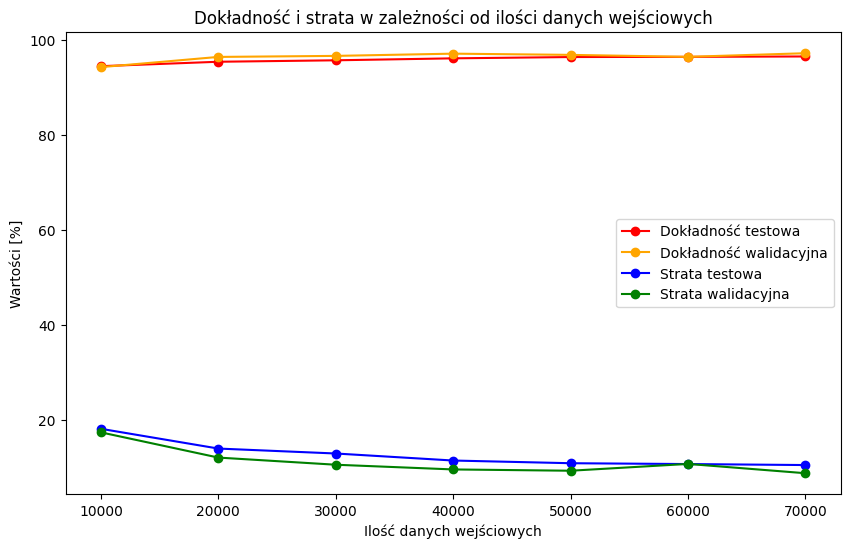

In [56]:
plot_results(vgg19_df)

# Badanie optymalnej liczby epok

In [57]:
CHOOSEN_SIZE = 50000
EPOCHS = 50

## VGG16


In [58]:
from collections import defaultdict

modelVgg = 'VGG16'
history_vgg16, training_time_vgg16 = input_data_analysis(modelVgg, CHOOSEN_SIZE, images, labels, seeds, EPOCHS)


 ------------------------------  Ilość danych wejściowych: 50000, model: VGG16  ------------------------------ 


 ----------------------------------------  Tworzenie modelu VGG16  ---------------------------------------- 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_18 (Flatten)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                2570      
                          

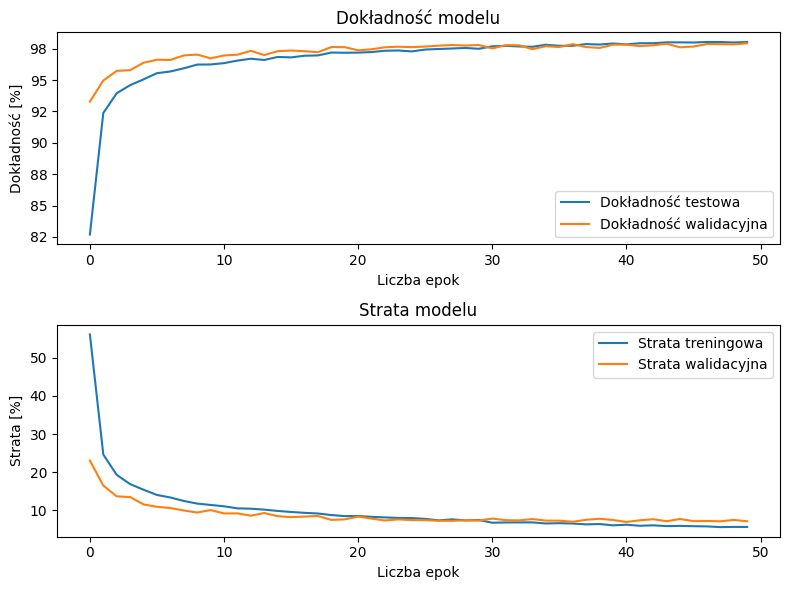

In [104]:
plot_accuracy_and_loss(history_vgg16)

## VGG19


In [68]:
from collections import defaultdict

modelVgg = 'VGG19'
history_vgg19, training_time_vgg19 = input_data_analysis(modelVgg, CHOOSEN_SIZE, images, labels, seeds, EPOCHS)


 ------------------------------  Ilość danych wejściowych: 50000, model: VGG19  ------------------------------ 


 ----------------------------------------  Tworzenie modelu VGG19  ---------------------------------------- 

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_19 (Flatten)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                          

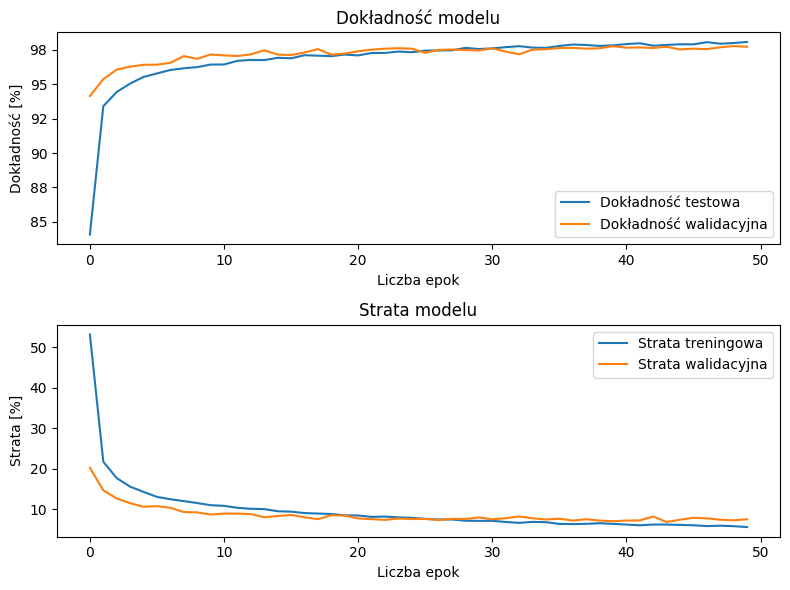

In [105]:
plot_accuracy_and_loss(history_vgg19)